In [1]:
import sys
import numpy as np

sys.path.insert(0, "/usr/src/code/src")

from pre_process_code.imputation import *
from plots import *
from stats import *
from cd_diagram import *
from aeon.datasets import load_from_tsfile
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    balanced_accuracy_score,
)

%matplotlib inline


In [8]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
datasets = [
    "ERing",
    "Epilepsy",
    "Heartbeat",
    "UWaveGestureLibrary",
    "ArticularyWordRecognition",
    "EthanolConcentration",
    "Libras",
    "AsphaltPavementTypeCoordinates",
    "FingerMovements",
    "Handwriting",
]

models = [
    # "TSCRNNRel",
    # "TSCRNNAbs",
    # "TSCRNNTimestamps",
    # "TSCRNN",
    "TSCTransformerRel",
    "TSCTransformerAbs",
    "TSCTransformerTimestamps",
    "TSCTransformer",
    # "RidgeClassifier",
    # "CanonicalIntervalForest",
    # "HIVECOTEV2",
    # "ResNetClassifier",
]

pmisses = [0, 20, 40, 60, 70, 80, 90]

results, model_mean, pmiss_result = calculate_metrics(
    f1_score,
    base_path,
    datasets,
    models,
    pmisses,
    func_params={"average": "weighted"},
)

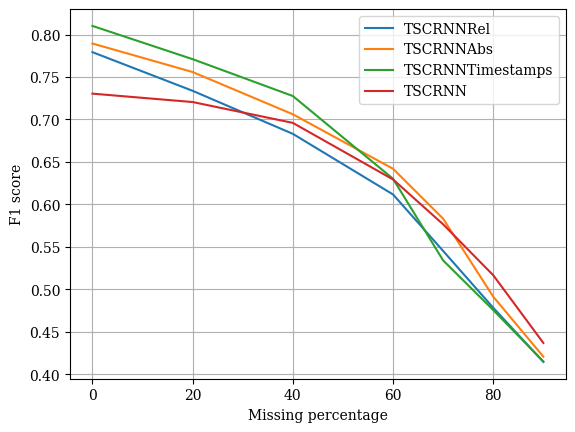

In [7]:
plot_metric(model_mean, metric="F1 score")

['TSCRNNTimestamps' 'TSCTransformerTimestamps' 'RidgeClassifier'
 'CanonicalIntervalForest' 'HIVECOTEV2' 'ResNetClassifier']
the null hypothesis over the entire classifiers cannot be rejected
CanonicalIntervalForest     0.0
HIVECOTEV2                  1.0
ResNetClassifier            2.0
RidgeClassifier             0.0
TSCRNNTimestamps            2.0
TSCTransformerTimestamps    5.0
dtype: float64
HIVECOTEV2                  4.5
CanonicalIntervalForest     3.9
RidgeClassifier             3.6
ResNetClassifier            3.4
TSCTransformerTimestamps    2.9
TSCRNNTimestamps            2.7
dtype: float64
('HIVECOTEV2', 'TSCRNNTimestamps', 0.037109375, False)
('CanonicalIntervalForest', 'HIVECOTEV2', 0.048828125, False)
('HIVECOTEV2', 'ResNetClassifier', 0.083984375, False)
('HIVECOTEV2', 'TSCTransformerTimestamps', 0.083984375, False)
('RidgeClassifier', 'TSCRNNTimestamps', 0.130859375, False)
('ResNetClassifier', 'TSCRNNTimestamps', 0.16015625, False)
('CanonicalIntervalForest', 'TSCRNNTime

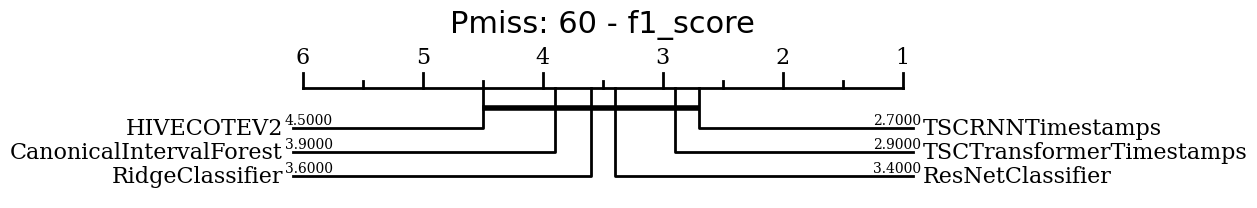

In [39]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
pmiss = 60
metric_name = "f1_score"

datasets = [
    "ERing",
    "Epilepsy",
    "Heartbeat",
    "UWaveGestureLibrary",
    "ArticularyWordRecognition",
    "EthanolConcentration",
    "Libras",
    "AsphaltPavementTypeCoordinates",
    "FingerMovements",
    "Handwriting",
]

models = [
    # "TSCRNNRel",
    # "TSCRNNAbs",
    "TSCRNNTimestamps",
    # "TSCRNN",
    # "TSCTransformerRel",
    # "TSCTransformerAbs",
    "TSCTransformerTimestamps",
    # "TSCTransformer",
    "RidgeClassifier",
    "CanonicalIntervalForest",
    "HIVECOTEV2",
    "ResNetClassifier",
]

df = gather_metric_cd(
    f1_score,
    "f1_score",
    base_path,
    datasets,
    models,
    pmiss,
    func_params={"average": "macro"},
)
draw_cd_diagram(metric_name, df, title=f"Pmiss: {pmiss} - {metric_name}", labels=True)